# Sales Data Visualizations

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn

%matplotlib inline

## Read in data set

In [2]:
# Data provided by https://www.superdatascience.com/
df = pd.read_csv("./OfficeSupplies.csv")

In [3]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95


In [4]:
df_units = df[["Rep", "Units"]]
df_units.head()

,Rep,Units
0,Richard,62
1,Nick,29
2,Morgan,55
3,Susan,81
4,Matthew,42


In [5]:
df_units.groupby("Rep").sum()

,Units
Rep,
Alex,281
Bill,213
James,142
Matthew,193
Morgan,173
Nick,125
Rachel,183
Richard,396
Smith,156


In [6]:
df_units.groupby("Rep").sum().head()

,Units
Rep,
Alex,281
Bill,213
James,142
Matthew,193
Morgan,173


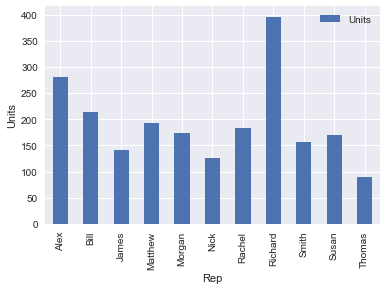

In [7]:
rep_plot = df_units.groupby("Rep").sum().plot(kind='bar')
rep_plot.set_xlabel("Rep")
rep_plot.set_ylabel("Units")

In [13]:
df["Total Price"] = df["Units"] * df["Unit Price"]
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-2014,East,Nick,Binder,29,1.99,57.71
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-2014,East,Susan,Binder,81,19.99,1619.19
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95,1005.90


In [14]:
df.sort_values("Total Price", ascending=False).head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Price
18,4-Dec-2014,Central,Alex,Binder,94,19.99,1879.06
3,29-Jul-2014,East,Susan,Binder,81,19.99,1619.19
25,1-Feb-2015,Central,Smith,Binder,87,15.00,1305.00
21,29-Dec-2014,East,Susan,Pen Set,74,15.99,1183.26
12,14-Oct-2014,West,Thomas,Binder,57,19.99,1139.43


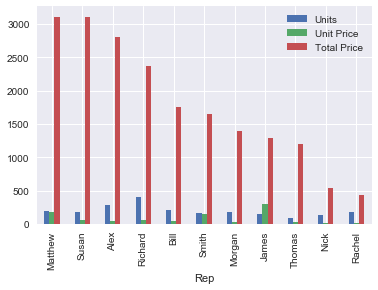

In [20]:
df.groupby("Rep").sum().sort_values("Total Price", ascending=False).plot(kind='bar')

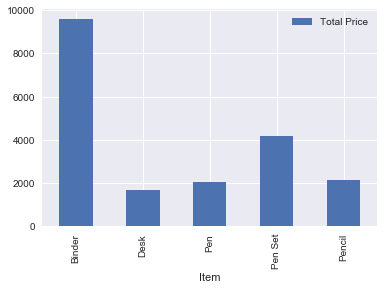

In [22]:
df_items = df[["Item", "Total Price"]]
df_items.groupby("Item").sum().plot(kind="bar")

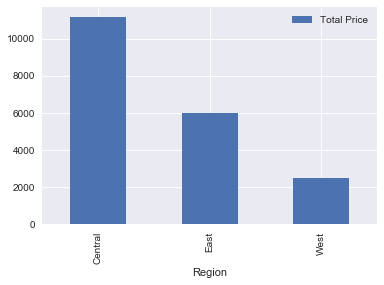

In [21]:
df_region = df[["Region", "Total Price"]]
df_region.groupby("Region").sum().plot(kind="bar")

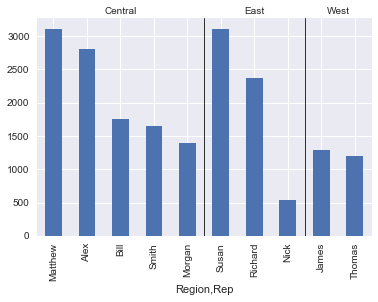

In [23]:
group = df.groupby(["Region","Rep"]).sum()
total_price = group["Total Price"].groupby(level=0, group_keys=False)

gtp = total_price.nlargest(5)
ax = gtp.plot(kind="bar")

#draw lines and titles
count = gtp.groupby("Region").count()
cs = np.cumsum(count)
for i in range(len(count)):
    title = count.index.values[i]
    ax.axvline(cs[i]-.5, lw=0.8, color="k")
    ax.text(cs[i]-(count[i]+1)/2., 1.02, title, ha="center",
            transform=ax.get_xaxis_transform())

# shorten xticklabels
ax.set_xticklabels([l.get_text().split(", ")[1][:-1] for l in ax.get_xticklabels()])